<a href="https://colab.research.google.com/github/KaifAhmad1/code-test/blob/main/LLM_Chatbot_for_Beekeeping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **RAG based Beekeeping Chatbot for Indian Beekeepers**

In [1]:
!pip install -qU \
     transformers \
     datasets \
     langchain \
     huggingface_hub \
     tiktoken \
     faiss-gpu \
     python-dotenv \
     accelerate \
     sentence_transformers \
     einops \
     bitsandbytes \
     unstructured unstructured[pdf] \
     pypdf \
     rapidocr-onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 23.2 MB/s eta 0:00:00


In [2]:
import os
from dotenv import load_dotenv
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from langchain_community.document_loaders import PDFPlumberLoader

In [4]:
loader = PDFPlumberLoader("/content/drive/MyDrive/Floral Calendar.pdf")

In [5]:
document = loader.load()

In [6]:
print(len(document))

420


In [7]:
document[70]

Document(page_content='Guntur District\nJan Feb Mar Apr May June July Aug Sep Oct Nov Dec\nPlant Name\nP N P N P N P N P N P N P N P N P N P N P N P N\nAnacardium occidentale(Geedimamidi)\nBrassica(Avalu)\nCajanus cajan (Kandulu)\nCicer arietinum (Shanagalu)\nCitrus aurantifolia(Nimma)\nCitrus sinensis (Batavia)\nCocos nucifera (Kobbarichettu)\nCucumis sativus(Dosakaya)\nDelonix regia(Sankesulu)\nDolichos lab-lab(Anumulu)\nEmblica officinalis (Vusiri)\nEucalyptus spp.(Nilgiri)\nHygrophila auriculata()\nLuffa spp.(Beera)\nMoringa oleifera(Mulaga)\nOryza sativa (Vari)\nPeltophorum pterocarpum(Konda chinta)\nPennesetum typhoides (Sajja)\nPhoenix sylvestris(Eetha)\nRecinus communis(Amudalu)\nSapindus emarginatus(Kunkudu)\nSorghum vulgare (Jonna)\nTamarindus indica (Chintachettu)\nVigna mungo (Minumulu)\nVigna radiata(Pesalu)\nVigna trilobata(Pillipesara)\nZea mays (Mokkajhona)\nSesamum indicum (Nuvvulu)\nBorassus flabellifer(Tadi)\nPsidium guajava (Jama)\nZizyphus spp. (Reghu, pariki,Gotti

In [8]:
document[70].page_content

'Guntur District\nJan Feb Mar Apr May June July Aug Sep Oct Nov Dec\nPlant Name\nP N P N P N P N P N P N P N P N P N P N P N P N\nAnacardium occidentale(Geedimamidi)\nBrassica(Avalu)\nCajanus cajan (Kandulu)\nCicer arietinum (Shanagalu)\nCitrus aurantifolia(Nimma)\nCitrus sinensis (Batavia)\nCocos nucifera (Kobbarichettu)\nCucumis sativus(Dosakaya)\nDelonix regia(Sankesulu)\nDolichos lab-lab(Anumulu)\nEmblica officinalis (Vusiri)\nEucalyptus spp.(Nilgiri)\nHygrophila auriculata()\nLuffa spp.(Beera)\nMoringa oleifera(Mulaga)\nOryza sativa (Vari)\nPeltophorum pterocarpum(Konda chinta)\nPennesetum typhoides (Sajja)\nPhoenix sylvestris(Eetha)\nRecinus communis(Amudalu)\nSapindus emarginatus(Kunkudu)\nSorghum vulgare (Jonna)\nTamarindus indica (Chintachettu)\nVigna mungo (Minumulu)\nVigna radiata(Pesalu)\nVigna trilobata(Pillipesara)\nZea mays (Mokkajhona)\nSesamum indicum (Nuvvulu)\nBorassus flabellifer(Tadi)\nPsidium guajava (Jama)\nZizyphus spp. (Reghu, pariki,Gotti)\nMajor Pollen Minor 

In [9]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [10]:
MARKDOWN_SEPARATORS = [
    "\n#{1,6} ",
    "```\n",
    "\n\\*\\*\\*+\n",
    "\n---+\n",
    "\n___+\n",
    "\n\n",
    "\n",
    " ",
    "",
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=30,
    add_start_index=True,
    strip_whitespace=True,
    separators=MARKDOWN_SEPARATORS,
)

In [11]:
splits = text_splitter.split_documents(document)

In [12]:
splits[30].page_content

'Jan Feb Mar Apr May June July Aug Sep Oct Nov Dec\nDistrict\nP N P N P N P N P N P N P N P N P N P N P N P N\nLATUR\nतुवर\nCajanus cajan ( )\n1 1 1 1\nकुसुम\nCarthamus tinctorious ( )\n1 1 1 1\nचना\nCicer arietinum ( )\n1 1 1 1\nका(cid:426)ी िनबू\nCitrus aurantifolia ( )\n1 2 1 2 1 2 1 2\nस(cid:361)ा\nCitrus reticulata ( )\n1 2\nमोसबी\nCitrus sinensis ( )\n1 2\nआवला\nEmblica officinalis ( )\n2 1 2 1\nिनलिगरी\nEucalyptus spp. ( )\n2 2 2 2\nरामतील\nGuizotia abyssinica ( )\n2 2 2 2\nसुयफुल\nHelianthus annuus ( )\n2 2 2 2 2 2\nशेवगा\nMoringa oleifera ( )\n2 2 2 2\nकेला\nMusa paradisica ( )\n1 1 1 1\nचावल\nOryza sativa ( )\n1 0 1 0\nअद(cid:304)(cid:566)\nParkinsonia aculeata ( )\n2 1 2 1 2 1\nबाजरा\nPennesetum typhoides ( )\n1 0 1 0\nिशदी\nPhoenix sylvestris ( )\n2 0 2 0\nवेडी बाभूळ\nProsopis juliflora ( )\n1 2 1 2 1 2\nअम(cid:349)द\nPsidium guvajava ( )\n2 1 2 1\nकडधा(cid:586)\nPulses ( )\n1 1 1 1\nतील\nSesamum indicum ( )\n2 2 2 2\n(cid:476)ार\nSorghum vulgare ( )\n2 1 2 1 2 1 2 1\nमुग\n

Model's maximum sequence length: 512


  0%|          | 0/591 [00:00<?, ?it/s]

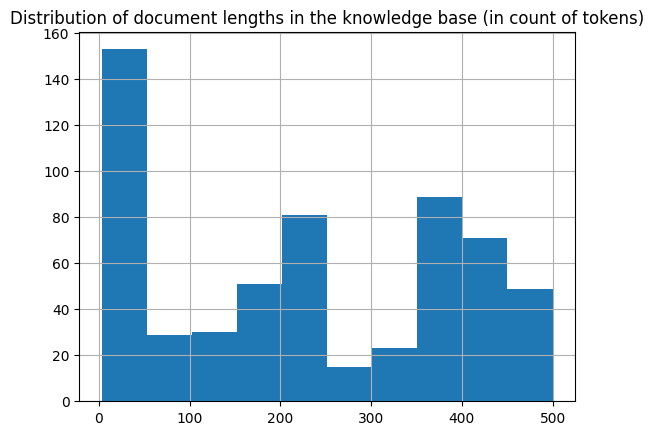

In [22]:
from tqdm.notebook import tqdm
from sentence_transformers import SentenceTransformer
import pandas as pd
import matplotlib.pyplot as plt
print(f"Model's maximum sequence length: {SentenceTransformer('thenlper/gte-small').max_seq_length}")

from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("thenlper/gte-small")
lengths = [len(tokenizer.encode(doc.page_content)) for doc in tqdm(splits)]

fig = pd.Series(lengths).hist()
plt.title("Distribution of document lengths in the knowledge base (in count of tokens)")
plt.show()

In [23]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "sentence-transformers/all-mpnet-base-v2"
model_kwargs = {"device": "cuda"}
embeddings = HuggingFaceEmbeddings(
    model_name=model_name, model_kwargs=model_kwargs
)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx